In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import sklearn

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df[['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']] = df[['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']].fillna((df[['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']].mean()))
df['CHAS'] = df['CHAS'].fillna(method='bfill')

In [4]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
regressor = DecisionTreeRegressor(max_depth = 6)
dt_reg = regressor.fit(x_train, y_train)
dt_reg

DecisionTreeRegressor(max_depth=6)

In [7]:
print(dt_reg.score(x_train, y_train))
print(dt_reg.score(x_test, y_test))

0.9539273064847269
0.6103413885523095


In [8]:
y_pred = dt_reg.predict(x_test)

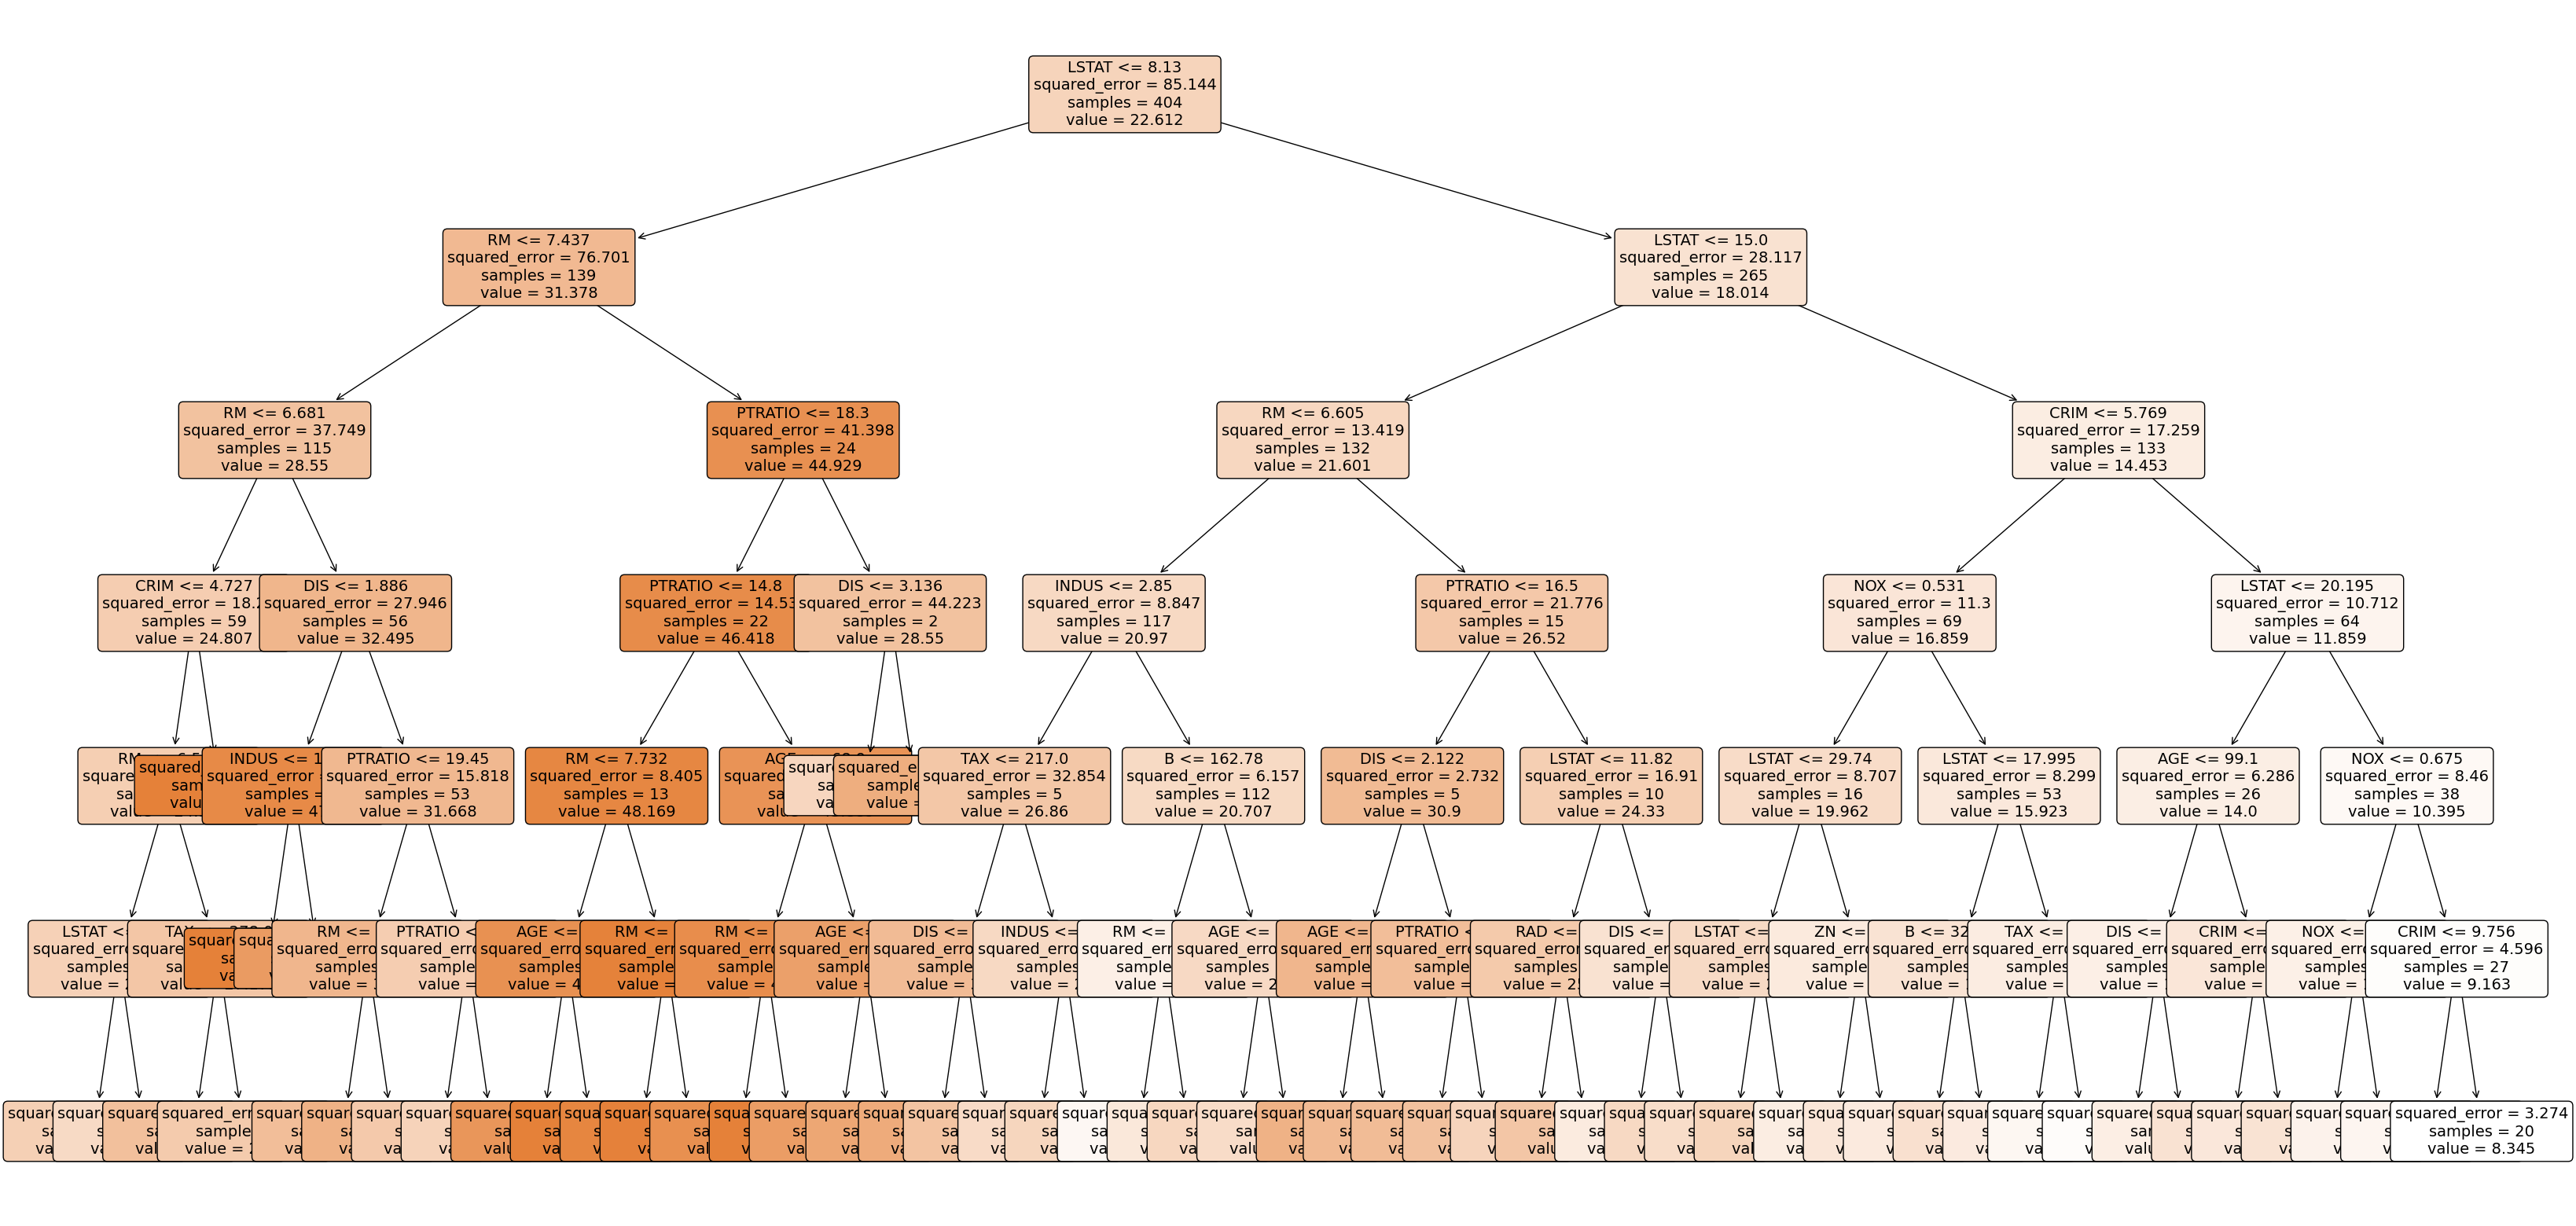

In [9]:
plt.figure(figsize=(40, 20))
_ = plot_tree(regressor,
             feature_names = x.columns,
             class_names = y,
             filled = True,
             rounded = True,
             fontsize = 14)
plt.savefig('plots/regression_tree.jpg', format='jpg', bbox_inches='tight')